In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [28]:
df= pd.read_csv('mcd.csv')

In [29]:
df.head(10)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,2,49,Once a month,Male
5,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,2,55,Every three months,Male
6,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,2,56,Every three months,Female
7,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,I love it!+5,23,Once a week,Female
8,No,No,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,58,Once a year,Male
9,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,No,1,32,Every three months,Female


In [30]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [31]:
variables=['yummy','convenient','spicy','fattening','greasy','fast','cheap','tasty','expensive','healthy','disgusting','Like','Age','VisitFrequency','Gender']

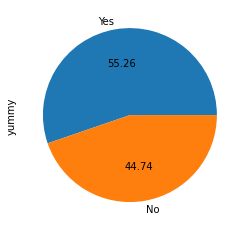

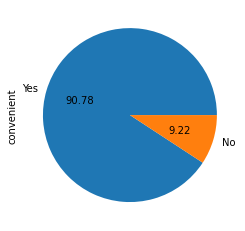

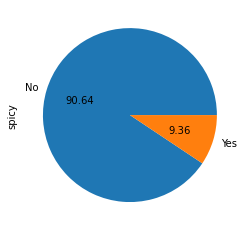

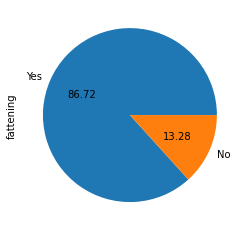

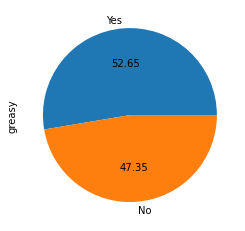

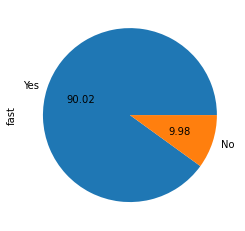

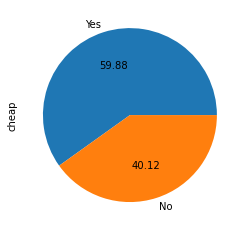

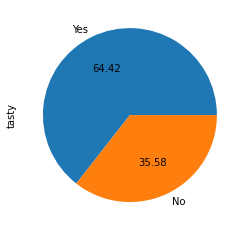

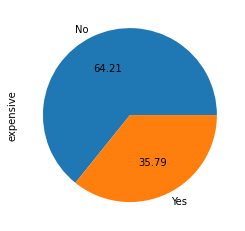

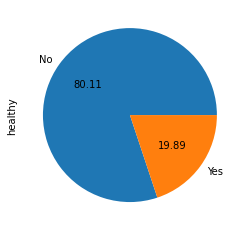

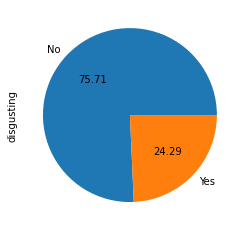

In [32]:
i=0
for i in range(11):
 df[variables[i]].value_counts().plot(kind='pie', autopct="%.2f")
 plt.show()

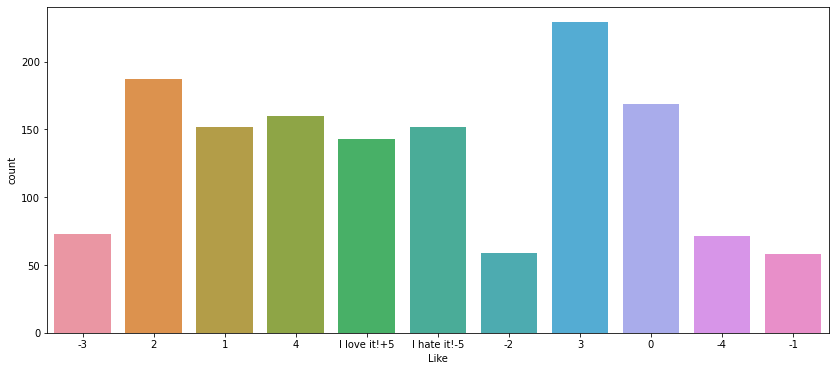

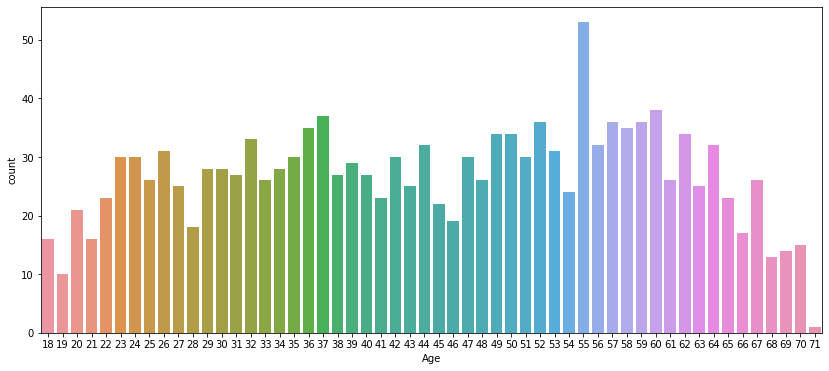

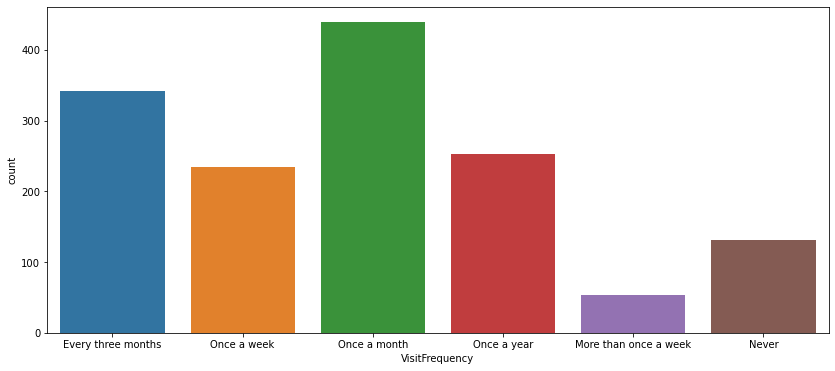

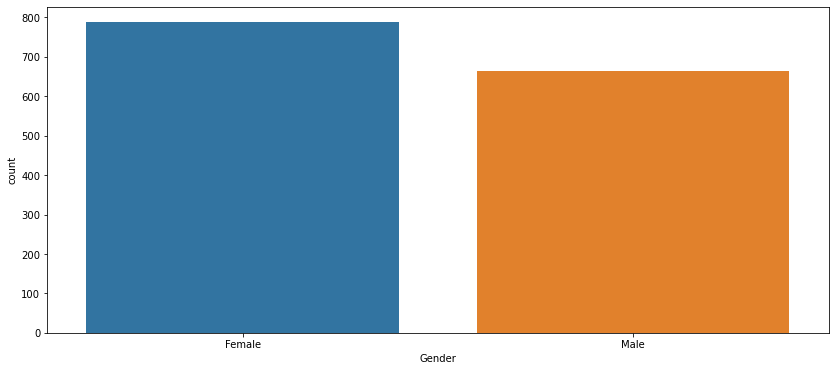

In [33]:
i=0
for i in range(4):
 fig,ax=plt.subplots(figsize=(14,6))
 sns.countplot(x=variables[i+11],data=df)

In [34]:
from sklearn.preprocessing import LabelEncoder
cols=['yummy','convenient','spicy','fattening','greasy','fast','cheap','tasty','expensive','healthy','disgusting','Gender']
le=LabelEncoder()
df[cols]=df[cols].apply(le.fit_transform)

In [35]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,0
1,1,1,0,1,1,1,1,1,1,0,0,2,51,Every three months,0
2,0,1,1,1,1,1,0,1,1,1,0,1,62,Every three months,0
3,1,1,0,1,1,1,1,1,0,0,1,4,69,Once a week,0
4,0,1,0,1,1,1,1,0,0,1,0,2,49,Once a month,1


In [36]:
le1=LabelEncoder()
df.loc[:,'Like']=pd.factorize(df['Like'])[0].reshape(-1,1)
df.loc[:,'VisitFrequency']=pd.factorize(df['VisitFrequency'])[0].reshape(-1,1)                                

In [37]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,0,61,0,0
1,1,1,0,1,1,1,1,1,1,0,0,1,51,0,0
2,0,1,1,1,1,1,0,1,1,1,0,2,62,0,0
3,1,1,0,1,1,1,1,1,0,0,1,3,69,1,0
4,0,1,0,1,1,1,1,0,0,1,0,1,49,2,1


<AxesSubplot:>

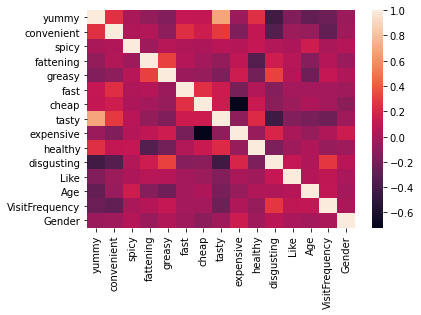

In [38]:
corr=df.corr()
sns.heatmap(corr)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   yummy           1453 non-null   int32
 1   convenient      1453 non-null   int32
 2   spicy           1453 non-null   int32
 3   fattening       1453 non-null   int32
 4   greasy          1453 non-null   int32
 5   fast            1453 non-null   int32
 6   cheap           1453 non-null   int32
 7   tasty           1453 non-null   int32
 8   expensive       1453 non-null   int32
 9   healthy         1453 non-null   int32
 10  disgusting      1453 non-null   int32
 11  Like            1453 non-null   int64
 12  Age             1453 non-null   int64
 13  VisitFrequency  1453 non-null   int64
 14  Gender          1453 non-null   int32
dtypes: int32(12), int64(3)
memory usage: 102.3 KB


In [40]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x=sc.fit_transform(df)
newdf=pd.DataFrame(x,columns=df.columns)



In [41]:
newdf.head()


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.811321,0.0,0.0
1,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.1,0.622642,0.0,0.0
2,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.2,0.830189,0.0,0.0
3,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.3,0.962264,0.2,0.0
4,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.1,0.584906,0.4,1.0


In [42]:
X=newdf.iloc[:,0:10]

In [43]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(n_clusters=4)

In [44]:
y=kmeans.predict(X)

In [45]:
y

array([2, 3, 3, ..., 3, 0, 1])

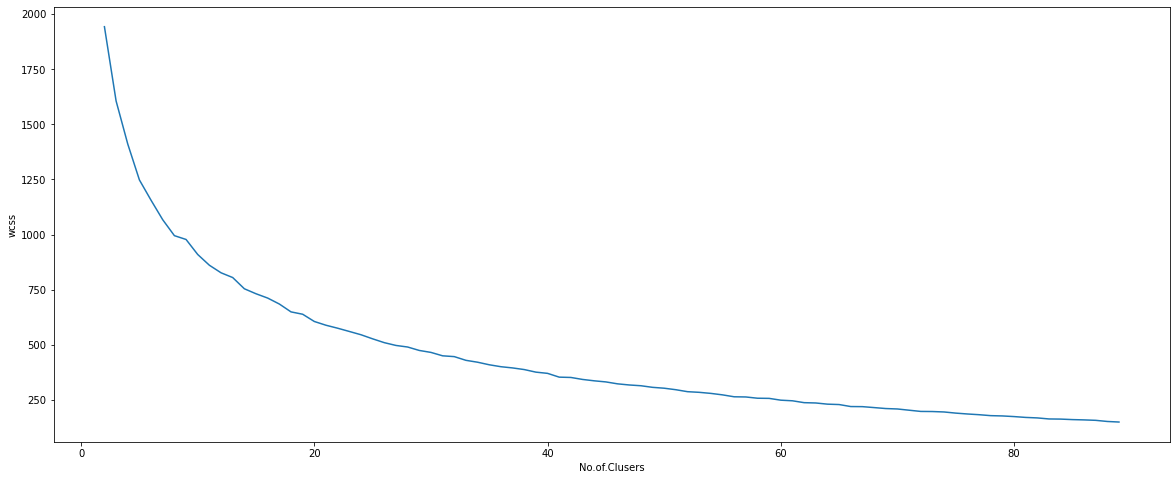

In [46]:
wcss=[]
nclus=range(2,90)
for k in nclus:
  kmeans=KMeans(n_clusters=k)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(20,8))
plt.plot(nclus,wcss)
plt.xlabel("No.of.Clusers")
plt.ylabel("wcss")
plt.show()


In [47]:
newdf['cluster'] = y

In [48]:
newdf.iloc[15:30,11:16]

,Like,Age,VisitFrequency,Gender,cluster
15,0.7,0.622642,0.4,1.0,0
16,0.8,0.301887,0.4,0.0,0
17,0.1,0.245283,0.4,1.0,3
18,0.9,0.547170,0.0,0.0,1
19,0.4,0.358491,0.8,1.0,3
20,0.1,0.433962,0.6,0.0,3
21,0.1,0.339623,0.4,1.0,0
22,0.6,0.094340,0.2,0.0,3
23,0.4,0.603774,0.8,0.0,3
24,0.1,0.396226,0.0,0.0,0


In [49]:
d_1 = newdf[newdf.cluster==0]
d_2 = newdf[newdf.cluster==1]
d_3 = newdf[newdf.cluster==2]
d_4 = newdf[newdf.cluster==3]


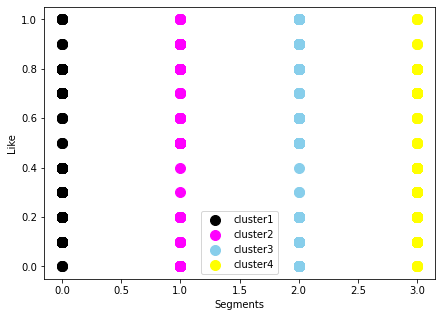

In [61]:
plt.figure(figsize=(7,5))
plt.scatter(d_1['cluster'],d_1['Like'],c='black',s=100,label='cluster1')
plt.scatter(d_2['cluster'],d_2['Like'],c='magenta',s=100,label='cluster2')
plt.scatter(d_3['cluster'],d_3['Like'],c='skyblue',s=100,label='cluster3')
plt.scatter(d_4['cluster'],d_4['Like'],c='yellow',s=100,label='cluster4')


plt.xlabel('Segments')
plt.ylabel('Like')
plt.legend()
plt.show()

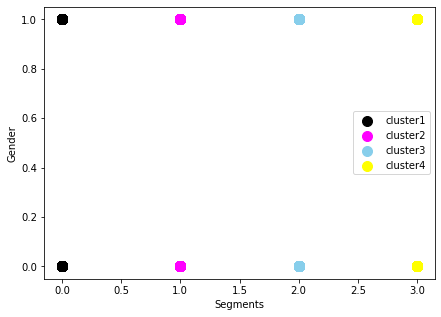

In [62]:
plt.figure(figsize=(7,5))
plt.scatter(d_1['cluster'],d_1['Gender'],c='black',s=100,label='cluster1')
plt.scatter(d_2['cluster'],d_2['Gender'],c='magenta',s=100,label='cluster2')
plt.scatter(d_3['cluster'],d_3['Gender'],c='skyblue',s=100,label='cluster3')
plt.scatter(d_4['cluster'],d_4['Gender'],c='yellow',s=100,label='cluster4')


plt.xlabel('Segments')
plt.ylabel('Gender')
plt.legend()
plt.show()

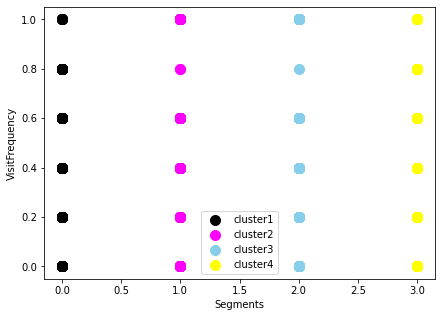

In [63]:
plt.figure(figsize=(7,5))
plt.scatter(d_1['cluster'],d_1['VisitFrequency'],c='black',s=100,label='cluster1')
plt.scatter(d_2['cluster'],d_2['VisitFrequency'],c='magenta',s=100,label='cluster2')
plt.scatter(d_3['cluster'],d_3['VisitFrequency'],c='skyblue',s=100,label='cluster3')
plt.scatter(d_4['cluster'],d_4['VisitFrequency'],c='yellow',s=100,label='cluster4')


plt.xlabel('Segments')
plt.ylabel('VisitFrequency')
plt.legend()
plt.show()

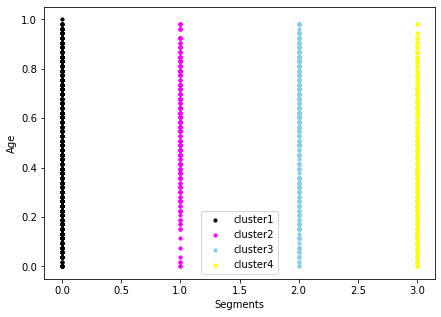

In [64]:
plt.figure(figsize=(7,5))
plt.scatter(d_1['cluster'],d_1['Age'],c='black',s=10,label='cluster1')
plt.scatter(d_2['cluster'],d_2['Age'],c='magenta',s=10,label='cluster2')
plt.scatter(d_3['cluster'],d_3['Age'],c='skyblue',s=10,label='cluster3')
plt.scatter(d_4['cluster'],d_4['Age'],c='yellow',s=10,label='cluster4')


plt.xlabel('Segments')
plt.ylabel('Age')
plt.legend()
plt.show()